<a href="https://colab.research.google.com/github/CristianMihalceanu/NLP-Project/blob/main/Twitter_Depression_Project_Final_v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Depression NLP project

## General Findings
 
Prevention is oftentimes considered to be the medicine for any medical condition. The question that ignited this project was:
" How can one be prevented from committing suicide? "
 
The person that is suffering usually leaves behind a final message. If we can interpret the meassage soon enough, then we might have a better chance of preventing suicides.

Below, with an accuracy of 75% is was possible to predict whether the person who wrote a certain message suffers from depression or not. 

Interesting findings along the way have been that depressed individuals tend to write longer messages ( >150 words ) than "healthy" people, or use significantly less verbs throughout what they say.  

## Gathering the data

Data was collected from "Sentiment140 dataset with 1.6 million tweets" dataset on Kaggle: https://www.kaggle.com/kazanova/sentiment140
 and later further engineered by me

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel('Registru1.xlsx')

Let's take a look at our dataset:

In [ ]:
df.head(-5)

,Depression,ID,Time,Username,Text
0,0,2260767020,Sat Jun 20 19:44:29 PDT 2009,madsylvester,I actually got a rockin' gift for @Chauncey_Dr...
1,0,2260767397,Sat Jun 20 19:44:31 PDT 2009,mssslee,im sooo tired and i havent really done anythin...
2,0,2260767994,Sat Jun 20 19:44:34 PDT 2009,BrentLauren,@SweetLeafCEO 10pm sucks. Sorrie
3,0,2260768735,Sat Jun 20 19:44:38 PDT 2009,tarheelprincess,"@MOCAShop Wow, normally a Ferrell fan. This ma..."
4,0,2260769159,Sat Jun 20 19:44:40 PDT 2009,FRaphael,Kinda peeved that I missed all the good food
...,...,...,...,...,...
159991,4,1685554451,Sun May 03 00:55:27 PDT 2009,juliadrab,is loving the new Jonas show &lt;3 ITS A COLAN...
159992,4,1685554530,Sun May 03 00:55:28 PDT 2009,skiippiie,yay im finally going to be able to drive soon ...
159993,4,1685554532,Sun May 03 00:55:28 PDT 2009,ashleyny,I'm weird. Deal with it.
159994,4,1685554666,Sun May 03 00:55:30 PDT 2009,hesa,"@HurphyDurphy oh honey, you'll find one.. ha..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160001 entries, 0 to 160000
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Depression  160001 non-null  int64 
 1   ID          160001 non-null  int64 
 2   Time        160001 non-null  object
 3   Username    160001 non-null  object
 4   Text        159975 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.1+ MB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Depression,160001.0,1.999988e+00,2.000006e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00
ID,160001.0,1.936544e+09,3.618259e+08,1.467822e+09,1.559611e+09,2.260767e+09,2.296459e+09,2.329206e+09


In [ ]:
df['Depression'].value_counts()

0    80001
4    80000
Name: Depression, dtype: int64

In [ ]:
df.dtypes

Depression     int64
ID             int64
Time          object
Username      object
Text          object
dtype: object

## Feature Generation

In [ ]:
df['Time']=pd.to_datetime(df['Time'])

/usr/local/lib/python3.6/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [ ]:
df.dtypes

Depression             int64
ID                     int64
Time          datetime64[ns]
Username              object
Text                  object
dtype: object

Seing how the Time column now consists of datetime objects, we can call certain attributes off of it to generate new features

In [ ]:
df['hour']=df['Time'].apply(lambda x:x.hour)

In [ ]:
df['hour']

0         19
1         19
2         19
3         19
4         19
          ..
159996     0
159997     0
159998     0
159999     0
160000     0
Name: hour, Length: 160001, dtype: int64

In [ ]:
df['minute']=df['Time'].apply(lambda x:x.minute)
df['seconds']=df['Time'].apply(lambda x:x.second)
df['month']=df['Time'].apply(lambda x:x.month)
df['day']=df['Time'].apply(lambda x:x.day)


In [ ]:
df.head(-5)

,Depression,ID,Time,Username,Text,hour,minute,seconds,month,day
0,0,2260767020,2009-06-20 19:44:29,madsylvester,I actually got a rockin' gift for @Chauncey_Dr...,19,44,29,6,20
1,0,2260767397,2009-06-20 19:44:31,mssslee,im sooo tired and i havent really done anythin...,19,44,31,6,20
2,0,2260767994,2009-06-20 19:44:34,BrentLauren,@SweetLeafCEO 10pm sucks. Sorrie,19,44,34,6,20
3,0,2260768735,2009-06-20 19:44:38,tarheelprincess,"@MOCAShop Wow, normally a Ferrell fan. This ma...",19,44,38,6,20
4,0,2260769159,2009-06-20 19:44:40,FRaphael,Kinda peeved that I missed all the good food,19,44,40,6,20
...,...,...,...,...,...,...,...,...,...,...
159991,4,1685554451,2009-05-03 00:55:27,juliadrab,is loving the new Jonas show &lt;3 ITS A COLAN...,0,55,27,5,3
159992,4,1685554530,2009-05-03 00:55:28,skiippiie,yay im finally going to be able to drive soon ...,0,55,28,5,3
159993,4,1685554532,2009-05-03 00:55:28,ashleyny,I'm weird. Deal with it.,0,55,28,5,3
159994,4,1685554666,2009-05-03 00:55:30,hesa,"@HurphyDurphy oh honey, you'll find one.. ha...",0,55,30,5,3


Perhaps one of the most important aspects of a written message is its length:

In [ ]:
df['length']=df['Text'].apply(lambda x: len(str(x)))

Visualizing the results through a plot will take place in the EDA section

In [ ]:
df

,Depression,ID,Time,Username,Text,hour,minute,seconds,month,day,length
0,0,2260767020,2009-06-20 19:44:29,madsylvester,I actually got a rockin' gift for @Chauncey_Dr...,19,44,29,6,20,120
1,0,2260767397,2009-06-20 19:44:31,mssslee,im sooo tired and i havent really done anythin...,19,44,31,6,20,124
2,0,2260767994,2009-06-20 19:44:34,BrentLauren,@SweetLeafCEO 10pm sucks. Sorrie,19,44,34,6,20,33
3,0,2260768735,2009-06-20 19:44:38,tarheelprincess,"@MOCAShop Wow, normally a Ferrell fan. This ma...",19,44,38,6,20,130
4,0,2260769159,2009-06-20 19:44:40,FRaphael,Kinda peeved that I missed all the good food,19,44,40,6,20,45
...,...,...,...,...,...,...,...,...,...,...,...
159996,4,1685554684,2009-05-03 00:55:31,Heidi_vb,"morn all, waitin 4 the sun 2 reappear, so cool...",0,55,31,5,3,133
159997,4,1685554730,2009-05-03 00:55:31,KrissyJill,Why am I still up at 3am? Good grief and good ...,0,55,31,5,3,53
159998,4,1685554798,2009-05-03 00:55:32,dwmoook,Morning world. Taking my parents out for a me...,0,55,32,5,3,129
159999,4,1685554800,2009-05-03 00:55:32,chastinevegas,drive ins are fun...just saying.,0,55,32,5,3,33


In [ ]:
len(df['Text'][0])

120

In [ ]:
def explicit(x):
  if x==0:
    return "Fine"
  else: 
    return "Depressed"

In [ ]:
df['Condition']=df['Depression'].apply(explicit)

In [ ]:
df.head(-5)

,Depression,ID,Time,Username,Text,hour,minute,seconds,month,day,length,Condition
0,0,2260767020,2009-06-20 19:44:29,madsylvester,I actually got a rockin' gift for @Chauncey_Dr...,19,44,29,6,20,120,Fine
1,0,2260767397,2009-06-20 19:44:31,mssslee,im sooo tired and i havent really done anythin...,19,44,31,6,20,124,Fine
2,0,2260767994,2009-06-20 19:44:34,BrentLauren,@SweetLeafCEO 10pm sucks. Sorrie,19,44,34,6,20,33,Fine
3,0,2260768735,2009-06-20 19:44:38,tarheelprincess,"@MOCAShop Wow, normally a Ferrell fan. This ma...",19,44,38,6,20,130,Fine
4,0,2260769159,2009-06-20 19:44:40,FRaphael,Kinda peeved that I missed all the good food,19,44,40,6,20,45,Fine
...,...,...,...,...,...,...,...,...,...,...,...,...
159991,4,1685554451,2009-05-03 00:55:27,juliadrab,is loving the new Jonas show &lt;3 ITS A COLAN...,0,55,27,5,3,98,Depressed
159992,4,1685554530,2009-05-03 00:55:28,skiippiie,yay im finally going to be able to drive soon ...,0,55,28,5,3,83,Depressed
159993,4,1685554532,2009-05-03 00:55:28,ashleyny,I'm weird. Deal with it.,0,55,28,5,3,25,Depressed
159994,4,1685554666,2009-05-03 00:55:30,hesa,"@HurphyDurphy oh honey, you'll find one.. ha...",0,55,30,5,3,126,Depressed


In [ ]:
df.drop(['Depression',	'ID',	'Time',	'Username'],inplace=True,axis=1)

After dropping columns which are no longer useful to us, let's proceed to checking if a message consists of just a blank space

In [ ]:
blank_tweets=[]

for index, t ,hour, min, sec, month, d, length, C in df.itertuples():
  if type(t)==str:
    if t.isspace():
      blank_tweets.append(index)

In [ ]:
len(blank_tweets)
# df.drop(blank_tweets,inplace=True)

0

Fortunately, this is not the case in our dataset

## EDA

In the cell below, we import Spacy, the Natural Language Processing library and later we extract a random text message 

In [ ]:
import random
random_index=random.randint(0,160000)

import spacy
nlp=spacy.load('en_core_web_sm')
from spacy import displacy

doc=nlp(df['Text'][random_index])
print(doc)

my first time on twitter!!! 


In [ ]:
random_index #64345 #93717 #148978 #96957

131224

After playing around for a bit, we stumbled upon message #148978, which is representative for nowadays young generation

In [ ]:
# why do twitter pictures have to be so damn small ?!

Spacy is able to recognize the tokens within our Doc

In [ ]:
doc=nlp(df['Text'][148978])
print(doc)

for token in doc:
  print(token.text)

why do twitter pictures have to be so damn small ?! 
why
do
twitter
pictures
have
to
be
so
damn
small
?
!


Let's explore the morphological relations between obtained tokens

In [ ]:
displacy.render(doc,jupyter=True,style='dep')

In [ ]:
doc.ents

()

In [ ]:
displacy.render(doc,jupyter=True,style='ent')

/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


It would seem that Spacy picked up no entities from our phrase. Let's improve on that, considering Twitter should be recognized as an organization

In [ ]:
from spacy.tokens import Span
ORG=doc.vocab.strings[u'ORG']

In [ ]:
ORG

383

In [ ]:
new_entity=Span(doc,2,3,label=ORG)
doc.ents=list(doc.ents)+[new_entity]

In [ ]:
options={'colors':{'ORG':'linear-gradient(90deg,orange,turquoise)'}}
displacy.render(doc,jupyter=True,style='ent',options=options)

# can't tell if that looks better or worse


Up next, let's try to find out how many people mention it plainly that they are suffering. Let's search for useful phrases in the texts

In [ ]:
from spacy.matcher import PhraseMatcher
matcher=PhraseMatcher(nlp.vocab) 

In [ ]:
found_matches=[]

In [ ]:
phrases_to_look_for=['i fell sad','feel lonely','am lonely','not hungry','is pointless','no point','am depressed','feel depressed','need help','help me']

phrases=[nlp(text) for text in phrases_to_look_for]

matcher.add('Depression', None,*phrases)


for x in df['Text'][-1000:]:
  doc1=nlp(str(x))
  found_matches.append(matcher(doc1))


In [ ]:
# found_matches

In [ ]:
sum=0
for i in found_matches:
  sum+=len(i)
print(sum)  



1


Out of 1000 individuals confirmed of suffering from depression, only 1 mentioned publicly how he/she feels

Which means we'll have to search for further clues of pain and sadness

The next idea is to print Wordclouds for each category of individuals: those that are suffering and those that are fine and search for differences

In [ ]:
type(df['Text'][0])

str

In [ ]:
nlp(df['Text'][10])

Last night out in Chi 

In [ ]:
type(nlp(df['Text'][10]))

spacy.tokens.doc.Doc

In [ ]:
df['Text']

0         I actually got a rockin' gift for @Chauncey_Dr...
1         im sooo tired and i havent really done anythin...
2                         @SweetLeafCEO 10pm sucks. Sorrie 
3         @MOCAShop Wow, normally a Ferrell fan. This ma...
4             Kinda peeved that I missed all the good food 
                                ...                        
159996    morn all, waitin 4 the sun 2 reappear, so cool...
159997    Why am I still up at 3am? Good grief and good ...
159998    Morning world.  Taking my parents out for a me...
159999                    drive ins are fun...just saying. 
160000                   i like my twitter page background 
Name: Text, Length: 160001, dtype: object

In [ ]:
my_string = ' '.join([str(text) for text in df['Text'][85000:95000]])

Joining the messages into one great string makes it easier to eliminate punctuation and most common words ( stop words )

In [ ]:
len(my_string)

761454

In [ ]:
list1=[token.text.lower() for token in nlp(my_string) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

' '.join(list1)

"@foodieguide okay we need to have a competition to see whether you or i have the dodgiest cantonese i bet i win @perfectelement noooooooo i wish i just saw it advertised lmao i am going for this one i swear you can not get anything better than a 100 degree shower and then a good cuppa tea i m in a better mood now @sammijo66 if it 's only a paper i 'd suggest a a pigeon b a message in a bottle c other don't know i 've been playing with sqlite what do i think of it awesome recording a new video i got my necklace and eyeko lip balm from asos today happy bunny @xhelloxgoodbyex ahhh i love it the books are so good ca n't wait for new moon @peaceoflove08 alright well just let me know good night first came software as a service ... now food as a service http://is.gd/rauq started on my class newsletter today and am almost done heck yeah @mensdomain gigglesssssssssssssss there ya go @ferretprincess the word cloud is very alarming ... i say good a lot apparently i like that though .... going sh

In [ ]:
important_tokens=[word for word in list1 if not nlp.vocab[word].is_stop]

print(important_tokens)

['@foodieguide', 'okay', 'need', 'competition', 'dodgiest', 'cantonese', 'bet', 'win', '@perfectelement', 'noooooooo', 'wish', 'saw', 'advertised', 'lmao', 'going', 'swear', 'better', '100', 'degree', 'shower', 'good', 'cuppa', 'tea', 'm', 'better', 'mood', '@sammijo66', 'paper', 'suggest', 'pigeon', 'b', 'message', 'bottle', 'c', "don't", 'know', 'playing', 'sqlite', 'think', 'awesome', 'recording', 'new', 'video', 'got', 'necklace', 'eyeko', 'lip', 'balm', 'asos', 'today', 'happy', 'bunny', '@xhelloxgoodbyex', 'ahhh', 'love', 'books', 'good', 'wait', 'new', 'moon', '@peaceoflove08', 'alright', 'let', 'know', 'good', 'night', 'came', 'software', 'service', '...', 'food', 'service', 'http://is.gd/rauq', 'started', 'class', 'newsletter', 'today', 'heck', 'yeah', '@mensdomain', 'gigglesssssssssssssss', 'ya', '@ferretprincess', 'word', 'cloud', 'alarming', '...', 'good', 'lot', 'apparently', 'like', '....', 'going', 'shopping', 'tomorrow', 'cinta', 'fun', 'wishing', 'big', 'brother', 'nel

In [ ]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

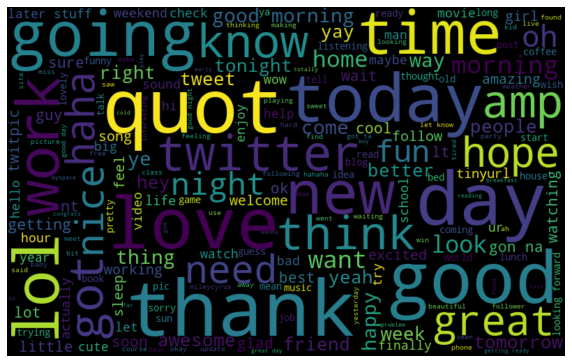

In [ ]:
tokens = ' '.join(important_tokens)
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(tokens)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Now that we have the Wordcloud for those that are suffering from depression, let's do the same for the healthy ones to be able to draw conclusions

In [ ]:
my_string2 = ' '.join([str(text) for text in df['Text'][:10000]])
list2=[token.text.lower() for token in nlp(my_string2) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']
important_tokens2=[word for word in list2 if not nlp.vocab[word].is_stop]


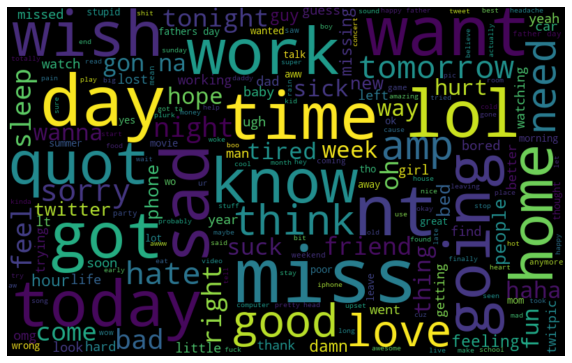

In [ ]:
tokens2 = ' '.join(important_tokens2)
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(tokens2)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Words like {"good","love","think"} seem to define people suffering from depression as individuals who are aware of how they feel, and value conection on an emotional level
On the other side, people clear of depression tend to be more active and grounded in reality, often using words like {"work","day","time"}. They also state feelings clearly: {"wish","miss","love"}

Earlier we promised to look at the differences in message length

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f32d538d390>,
      dtype=object)

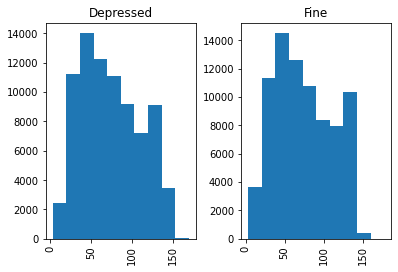

In [ ]:
df.hist(column='length',by='Condition')

Those that don't feel well tend to write long messages ( > 150 words ), which is almost a rarity among healthy individuals

How about what parts of speech each category uses when having a conversation?

In [ ]:
doc1=nlp(my_string)
POS_counts=doc1.count_by(spacy.attrs.POS)

In [ ]:
POS_counts

{84: 9377,
 85: 10585,
 86: 9728,
 87: 8512,
 89: 3496,
 90: 11903,
 91: 2319,
 92: 23098,
 93: 1894,
 94: 3900,
 95: 13075,
 96: 13883,
 97: 21814,
 98: 1684,
 99: 409,
 100: 18984,
 101: 543,
 103: 11292}

In [ ]:
for key, value in sorted(POS_counts.items()):
  print(f'{key}. {doc1.vocab[key].text:{5}} {value}')

84. ADJ   9377
85. ADP   10585
86. ADV   9728
87. AUX   8512
89. CCONJ 3496
90. DET   11903
91. INTJ  2319
92. NOUN  23098
93. NUM   1894
94. PART  3900
95. PRON  13075
96. PROPN 13883
97. PUNCT 21814
98. SCONJ 1684
99. SYM   409
100. VERB  18984
101. X     543
103. SPACE 11292


In [ ]:
doc2=nlp(my_string2)
POS_counts2=doc2.count_by(spacy.attrs.POS)

In [ ]:
POS_counts2

{84: 8722,
 85: 10013,
 86: 11381,
 87: 9885,
 89: 3954,
 90: 11678,
 91: 2127,
 92: 21682,
 93: 1909,
 94: 6123,
 95: 16203,
 96: 12643,
 97: 19969,
 98: 1804,
 99: 348,
 100: 22079,
 101: 391,
 103: 10833}

In [ ]:
for key, value in sorted(POS_counts2.items()):
  print(f'{key}. {doc2.vocab[key].text:{5}} {value}')

84. ADJ   8722
85. ADP   10013
86. ADV   11381
87. AUX   9885
89. CCONJ 3954
90. DET   11678
91. INTJ  2127
92. NOUN  21682
93. NUM   1909
94. PART  6123
95. PRON  16203
96. PROPN 12643
97. PUNCT 19969
98. SCONJ 1804
99. SYM   348
100. VERB  22079
101. X     391
103. SPACE 10833


The healthy people use almost 4000 more VERBS, which indicates they are more likely to take action for themselves, and that is also followed by a positive change in mentality

## Generating text as a depressed speaker

The following method for generating text is further explained at: https://www.udemy.com/course/nlp-natural-language-processing-with-python/

We group together 1000 messages written by those diagnosed with depression, obtain the tokens, from which we exclude punctuation, stop words and even tags( " @ " )

In [ ]:
my_string3 = ' '.join([str(text) for text in df['Text'][100000:101000]])
list3=[token.text.lower() for token in nlp(my_string3) if token.text not in '... .. .... \n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n  ' and token.text.isalpha() ]
refined_list3=[word for word in list3 if (word != '...') and ('@' not in word)]
important_tokens3=[word for word in refined_list3 if not nlp.vocab[word].is_stop]


In [ ]:
len(important_tokens3) # total number of words

5744

In [ ]:
train_len=50+1  # we'll be genearating a single word based off of 50 previus entries

text_sequences=[]

for i in range(train_len,len(important_tokens3)):
  seq=important_tokens3[i-train_len:i]
  text_sequences.append(seq)  # containing lists of sequences, successors differing by only the last word

In [ ]:
' '.join(text_sequences[0])

'stuffed working shower movie night thn sleeeeeep love shan let pretend rented watched double date tell family hello wanna come sure grace daughter impressed picked caroline new dog sweet eating lunch ferry umbrellas spf lotion loves rock everybody hast watch mommy thought looked good drunken mess haha charcoaled maybe draw picture'

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences=tokenizer.texts_to_sequences(text_sequences) #this will return a list of integer sequences encoding the words in our sentences

In [ ]:
tokenizer.index_word # we check what integer has been assigned to every word

{1: 'good',
 2: 'love',
 3: 'day',
 4: 'like',
 5: 'going',
 6: 'got',
 7: 'know',
 8: 'new',
 9: 'lol',
 10: 'thanks',
 11: 'fun',
 12: 'twitter',
 13: 'amp',
 14: 'today',
 15: 'm',
 16: 'haha',
 17: 'time',
 18: 'night',
 19: 'better',
 20: 'think',
 21: 'right',
 22: 'thank',
 23: 'watching',
 24: 'way',
 25: 'great',
 26: 'u',
 27: 'nice',
 28: 'tonight',
 29: 'hey',
 30: 'home',
 31: 'nt',
 32: 'oh',
 33: 'happy',
 34: 'tomorrow',
 35: 'life',
 36: 'ready',
 37: 's',
 38: 'yes',
 39: 'work',
 40: 'best',
 41: 'getting',
 42: 'come',
 43: 'beautiful',
 44: 'want',
 45: 'hope',
 46: 'wait',
 47: 'need',
 48: 'cool',
 49: 'bed',
 50: 'movie',
 51: 'follow',
 52: 'gon',
 53: 'na',
 54: 'shopping',
 55: 'try',
 56: 'pretty',
 57: 'watch',
 58: 'people',
 59: 'having',
 60: 'music',
 61: 'party',
 62: 'ya',
 63: 'yeah',
 64: 'look',
 65: 'bad',
 66: 'friend',
 67: 'soon',
 68: 'amazing',
 69: 'let',
 70: 'waiting',
 71: 'tweet',
 72: 'awesome',
 73: 'hi',
 74: 'feel',
 75: 'miss',
 76:

In [ ]:
tokenizer.word_counts

OrderedDict([('stuffed', 1),
             ('working', 459),
             ('shower', 54),
             ('movie', 667),
             ('night', 1229),
             ('thn', 6),
             ('sleeeeeep', 7),
             ('love', 2764),
             ('shan', 9),
             ('let', 571),
             ('pretend', 62),
             ('rented', 12),
             ('watched', 115),
             ('double', 65),
             ('date', 66),
             ('tell', 322),
             ('family', 323),
             ('hello', 222),
             ('wanna', 223),
             ('come', 785),
             ('sure', 327),
             ('grace', 22),
             ('daughter', 74),
             ('impressed', 24),
             ('picked', 127),
             ('caroline', 26),
             ('new', 1914),
             ('dog', 283),
             ('sweet', 233),
             ('eating', 489),
             ('lunch', 235),
             ('ferry', 83),
             ('umbrellas', 33),
             ('spf', 34),
             ('

In [ ]:
vocabulary_size=len(tokenizer.word_counts)

In [ ]:
vocabulary_size #unique words

2611

In [ ]:
import numpy as np
sequences=np.array(sequences)

In [ ]:
sequences # here we now have the words encoded and being parts of list as sequences

array([[2610,   82,  772, ...,  137, 2576,  169],
       [  82,  772,   50, ..., 2576,  169,  773],
       [ 772,   50,   18, ...,  169,  773,  224],
       ...,
       [  48,  599, 2575, ...,  292,   97, 2609],
       [ 599, 2575,   66, ...,   97, 2609,   81],
       [2575,   66,   82, ..., 2609,   81, 2611]])

In [ ]:
from keras.utils import to_categorical
X=sequences[:,:-1]  # first 50 words in each list, whcih we'll use to predict the 51-th
y=sequences[:,-1]
y=to_categorical(y,num_classes=vocabulary_size+1)
seq_len=X.shape[1]

In [ ]:
seq_len

50

In [ ]:
X.shape

(5693, 50)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding

### RNN and LSTM

Before we apply the Deep Learning algorithm, let's first refresh our memory on Recurrent Neural Networks

https://www.youtube.com/watch?v=LHXXI4-IEns

https://www.youtube.com/watch?v=8HyCNIVRbSU&t=517s

A sequence is defined as a particular order in which related things follow each other.


RNNs receive sequences as inputs, but unlike ANNs, which don't take the output of the current state into consideration as input for the following step, RNNs do. 

The "learning" is realized through an algorithm called Backpropagation, which adjusts coeficients at each step, unfortunately diminishing the value of the inputs at the lower levels.

So how do we mentain their data useful? The aswer is through Long Short-Term Memory units, which decide what proportion of the previous layer to keep.

For a more indepth explanation, check the video from the second link.

In [ ]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 50, input_length=seq_len))
    model.add(LSTM(200, return_sequences=True))
    model.add(LSTM(200))
    model.add(Dense(150, activation='relu'))

    model.add(Dense(vocabulary_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   
    model.summary()
    
    return model

In [ ]:
model=create_model(vocabulary_size+1,seq_len)

model.fit(X,y,batch_size=128, epochs=150,verbose=1)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 50, 50)            130600    
_________________________________________________________________
lstm_30 (LSTM)               (None, 50, 200)           200800    
_________________________________________________________________
lstm_31 (LSTM)               (None, 200)               320800    
_________________________________________________________________
dense_30 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_31 (Dense)             (None, 2612)              394412    
Total params: 1,076,762
Trainable params: 1,076,762
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
45/45 [==============================] - 28s 619ms/step - loss: 7.7338 - accuracy: 0.0069
Epoch 2

In [ ]:
model.save('depressed_final1.h5')

In [ ]:
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [ ]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    '''
    INPUTS:
    model : model that was trained on text data
    tokenizer : tokenizer that was fit on text data
    seq_len : length of training sequence
    seed_text : raw string text to serve as the seed
    num_gen_words : number of words to be generated by model
    '''
    
    # Final Output
    output_text = []
    
    # Intial Seed Sequence
    input_text = seed_text
    
    # Create num_gen_words
    for i in range(num_gen_words):
        
        # Take the input text string and encode it to a sequence
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        
        # Pad sequences to our trained rate (50 words in the video)
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        
        # Predict Class Probabilities for each word
        pred_word_ind = model.predict_classes(pad_encoded, verbose=0)[0]
        
        # Grab word
        pred_word = tokenizer.index_word[pred_word_ind] 
        
        # Update the sequence of input text (shifting one over with the new word)
        input_text += ' ' + pred_word
        
        output_text.append(pred_word)
        
    # Make it look like a sentence.
    return ' '.join(output_text)

In [ ]:
seed_text=text_sequences[random.randint(0,len(text_sequences))]

In [ ]:
model_1=load_model('depressed_final.h5')

Finally, we get to generate the text we have wanted:

In [ ]:
generate_text(model_1,tokenizer,seq_len,seed_text,num_gen_words=5)

'lca join wa tomorrow happy'

In [ ]:
# "missed beautiful finished day try" was the most coherent text generated

## Predictions

For our final part let's predict whether a given text message belongs to an individual suffering from depression or not

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df1=df[70000:90000].dropna()

X=df1['Text']
y=df1['Condition']

msg_train, msg_test, label_train, label_test = train_test_split(X,y,test_size=0.33)

After splitting the newly created dataset into a training set and a test set, we'll create a pipeline object, that performs simultaneously the following operations:
- Count Vectorization ( which combines all the steps we have been doing, such as tokenization, removal of punctuation and stop words, lowering the letters and assigning an integer to every unique token ) 
    --> we'll avoid using words that appear in more than 90% of the messages and also words that do no appear at least twice
- Tfidf Transformer ( which makes sure words that appear too frequently don't influence our prediction negatively, by reducind the coefficient that they get multiplied with )
- Multinomial NB ( just the usual Naive-Bayes classifier, used to create our predictions, after the data has been brought to a usable format)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipeline= Pipeline([( 'cv',CountVectorizer(max_df=0.9,min_df=2,stop_words='english')),
            ('tfidf',TfidfTransformer()),
            ('classifier',MultinomialNB())
          ])

In [ ]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.9,
                                 max_features=None, min_df=2,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
pred=pipeline.predict(msg_test)

## Evaluating performance

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
print(confusion_matrix(pred,label_test))
print(classification_report(pred,label_test))

[[2408  729]
 [ 898 2564]]
              precision    recall  f1-score   support

   Depressed       0.73      0.77      0.75      3137
        Fine       0.78      0.74      0.76      3462

    accuracy                           0.75      6599
   macro avg       0.75      0.75      0.75      6599
weighted avg       0.75      0.75      0.75      6599



Let's try to predict the result from using a text created in the spot:

In [ ]:
pipeline.predict(['going out']) #that's about right

array(['Fine'], dtype='<U9')

We alse got "Depressed" when the text that was typed was " Life is meaningless ", which seems like an honest prediction

## Furure work

Detecting a medical condition is solving one half of the problem, so work still has to be done in order to ensure that the suffering individual gets the best medical attention. 

Such procedures could also include creating a chatbot to provide the pacients someone to talk to.



## Conclusions



Individuals suffering from depression tend to write longer mesages ( > 150 words ).

They also use less VERBS, less calls to action, and sentiments such as "love" and "hope"appear with predilection throughout their conversations.

The model created achieved 75% accuracy at predicting depression, given a created-on-the-spot message.

Thank you for embarking with me on this journey!

To your next level,
      Mihalceanu Cristian